This script uses sklearn to train a linear regression model on the NBA data. Then the model is tested using NBA statistics from 2022-25. The three statistics that will be predicted are points, assists, and rebounds. The goal is to achieve an R2 score of 90% for each statistic.

In [12]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from linear_regression_class import linear_regression as lin

In [13]:
# Visualize data in tabular form
df = pd.read_csv('NBA_stats_3_years.csv')
df.head()

,GP_2-3,MIN_2-3,PTS_2-3,FGM_2-3,FGA_2-3,FG%_2-3,3PM_2-3,3PA_2-3,3P%_2-3,FTM_2-3,...,FTA_0-1,FT%_0-1,OREB_0-1,DREB_0-1,REB_0-1,AST_0-1,STL_0-1,BLK_0-1,TOV_0-1,EFF_0-1
0,73,31.5,13.9,5.5,9.8,55.6,0.5,1.9,29.0,2.4,...,3.1,74.3,1.7,4.2,5.9,2.5,0.6,0.6,1.8,16.7
1,78,16.3,6.6,2.4,5.3,44.6,1.1,2.8,38.7,0.7,...,1.1,86.8,0.4,1.6,1.9,2.4,0.7,0.1,1.1,7.3
2,65,26.8,8.6,3.3,6.4,51.1,1.7,4.0,41.9,0.4,...,1.4,84.2,1.6,6.1,7.7,3.4,0.7,1.3,0.9,17.7
3,63,32.5,21.1,8.4,15.6,53.7,0.5,1.8,29.7,3.9,...,3.2,71.1,1.9,3.5,5.5,2.6,0.8,0.9,2.0,12.6
4,79,17.1,8.4,3.4,6.1,55.6,0.0,0.0,0.0,1.6,...,2.2,52.4,3.1,6.2,9.3,1.8,1.1,0.9,1.6,15.9


In [14]:
# Remove outliers from training data. These are mainly players who have inflated or deflated statistics due to low playing time.

outliers = ((df['FG%_2-3'] > 90) |
            (df['FG%_2-3'] == 0) |
            (df['3P%_2-3'] > 90) |
            (df['3P%_2-3'] == 0) |
            (df['FT%_2-3'] == 0) |
            (df['FG%_1-2'] > 90) |
            (df['FG%_1-2'] == 0) |
            (df['3P%_1-2'] > 90) |
            (df['3P%_1-2'] == 0) |
            (df['FT%_1-2'] == 0) |
            (df['FG%_0-1'] > 90) |
            (df['FG%_0-1'] == 0) |
            (df['3P%_0-1'] > 90) |
            (df['3P%_0-1'] == 0) |
            (df['FT%_0-1'] == 0))

df = df[~outliers]

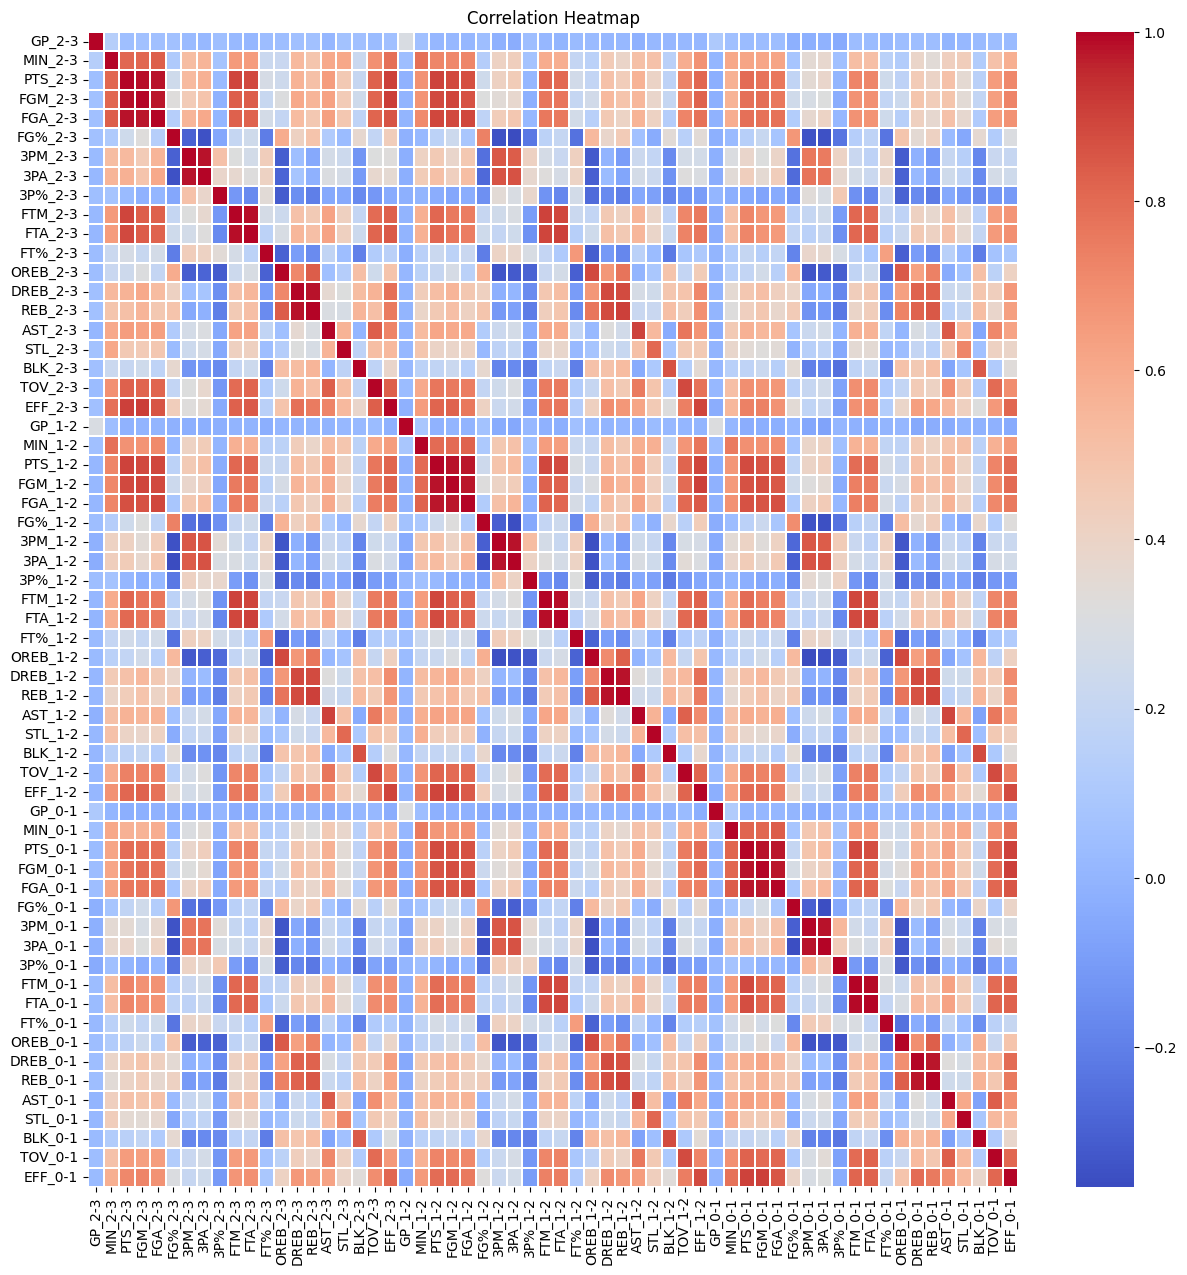

In [15]:
# Create a heatmap of the data to visualize the correlation of different statistics to one another
correlation = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Remove statistics from the third year excluding the desired output statistic
# Also remove statistics from the first 2 years with high correlation to the desired output, observed from the heatmap
# This counteracts potential overfitting from too many features

df_points = df
df_points.drop(['GP_2-3', 'MIN_2-3', 'FGM_2-3', 'FGA_2-3', 'FG%_2-3', '3PM_2-3', '3PA_2-3', '3P%_2-3', 'FTM_2-3', 'FTA_2-3', 'FT%_2-3', 'OREB_2-3', 'DREB_2-3', 'REB_2-3', 'AST_2-3', 'STL_2-3', 'BLK_2-3', 'TOV_2-3', 'EFF_2-3',
'GP_1-2','OREB_1-2', 'DREB_1-2', 'FGM_1-2', 'FGA_1-2', '3P%_1-2', '3PA_1-2', 'FT%_1-2',
'GP_0-1','OREB_0-1', 'DREB_0-1', 'FGM_0-1', 'FGA_0-1', '3P%_0-1', '3PA_0-1', 'FT%_0-1'], axis = 1)

df_assists = df
df_assists.drop(['GP_2-3', 'MIN_2-3', 'PTS_2-3', 'FGM_2-3', 'FGA_2-3', 'FG%_2-3', '3PM_2-3', '3PA_2-3', '3P%_2-3', 'FTM_2-3', 'FTA_2-3', 'FT%_2-3', 'OREB_2-3', 'DREB_2-3', 'REB_2-3', 'STL_2-3', 'BLK_2-3', 'TOV_2-3', 'EFF_2-3',
'GP_1-2','OREB_1-2', 'BLK_1-2', 'FT%_1-2', '3P%_1-2', 'FG%_1-2',
'GP_0-1','OREB_0-1', 'BLK_0-1', 'FT%_0-1', '3P%_0-1', 'FG%_0-1'], axis = 1)

df_rebounds = df
df_rebounds.drop(['GP_2-3', 'MIN_2-3', 'PTS_2-3', 'FGM_2-3', 'FGA_2-3', 'FG%_2-3', '3PM_2-3', '3PA_2-3', '3P%_2-3', 'FTM_2-3', 'FTA_2-3', 'FT%_2-3', 'OREB_2-3', 'DREB_2-3', 'AST_2-3', 'STL_2-3', 'BLK_2-3', 'TOV_2-3', 'EFF_2-3',
'GP_1-2','REB_1-2', 'DREB_1-2', 'STL_1-2', 'FT%_1-2', '3PM_1-2', '3PA_1-2',
'GP_0-1','REB_0-1', 'DREB_0-1', 'STL_0-1', 'FT%_0-1', '3PM_0-1', '3PA_0-1'], axis = 1)

,REB_2-3,MIN_1-2,PTS_1-2,FGM_1-2,FGA_1-2,FG%_1-2,3P%_1-2,FTM_1-2,FTA_1-2,OREB_1-2,...,FGA_0-1,FG%_0-1,3P%_0-1,FTM_0-1,FTA_0-1,OREB_0-1,AST_0-1,BLK_0-1,TOV_0-1,EFF_0-1
0,6.5,30.2,16.3,6.3,11.2,56.4,34.7,2.8,4.6,2.4,...,11.1,52.0,33.5,2.3,3.1,1.7,2.5,0.6,1.8,16.7
1,1.6,13.4,3.9,1.5,3.5,41.8,40.9,0.4,0.5,0.4,...,5.4,44.7,37.9,0.9,1.1,0.4,2.4,0.1,1.1,7.3
2,6.4,30.5,9.8,3.6,7.6,47.6,44.6,0.2,0.3,1.2,...,8.2,46.7,33.6,1.2,1.4,1.6,3.4,1.3,0.9,17.7
3,9.3,28.9,14.8,5.9,10.7,55.3,33.3,2.7,3.8,3.2,...,7.3,47.4,24.8,2.3,3.2,1.9,2.6,0.9,2.0,12.6
5,5.4,36.0,24.6,8.9,19.5,45.9,36.9,4.0,5.3,0.6,...,17.3,44.1,35.7,3.1,3.9,0.9,3.8,0.6,2.6,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,4.8,35.7,17.9,6.6,15.1,43.6,33.9,3.6,4.4,0.7,...,11.7,41.9,32.7,3.1,4.0,0.5,4.1,0.5,3.2,13.2
1045,2.4,16.5,5.8,2.0,6.2,33.3,29.7,0.7,0.9,0.4,...,10.0,40.7,39.4,2.0,2.4,0.8,2.6,0.4,1.3,11.5
1046,3.1,29.5,9.9,3.8,9.1,41.4,35.1,1.2,1.5,0.9,...,8.2,42.5,36.9,0.8,1.0,0.9,1.6,1.0,1.1,11.0
1047,3.1,33.7,15.9,5.6,12.5,44.8,38.9,1.8,2.4,0.6,...,12.3,44.1,39.3,3.1,3.7,0.6,2.4,0.2,1.3,14.6


In [23]:
# Iterate through different test_sizes and random_states to determine the most optimal model
test_sizes = [0.2, 0.25, 0.3, 0.35, 0.4]
random_states = [0, 20, 42, 110, 170, 260, 370, 500]

# Save best model settings in variables
best_score = [-1]*3
best_test_size = [-1]*3
best_random_state = [-1]*3

# Create 3 different models for predicting points, assists, and rebounds
model_p = LinearRegression()
model_a = LinearRegression()
model_r = LinearRegression()
for test_size in test_sizes:
    for random_state in random_states:
        # Split data for points
        X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(df_points.drop(columns = 'PTS_2-3'), df_points['PTS_2-3'], test_size=test_size, random_state=random_state)
        # fit the model
        model_p.fit(X_train_p, Y_train_p)
        # test model performance on validation data
        Y_pred_p = model_p.predict(X_test_p)
        if r2_score(Y_test_p, Y_pred_p) > best_score[0]:
            best_score[0] = r2_score(Y_test_p, Y_pred_p)
            best_test_size[0] = test_size
            best_random_state[0] = random_state
        
        # Split data for assists
        X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(df_assists.drop(columns = 'AST_2-3'), df_assists['AST_2-3'], test_size=test_size, random_state=random_state)
        # fit the model
        model_a.fit(X_train_a, Y_train_a)
        # test model performance on validation data
        Y_pred_a = model_a.predict(X_test_a)
        if r2_score(Y_test_a, Y_pred_a) > best_score[1]:
            best_score[1] = r2_score(Y_test_a, Y_pred_a)
            best_test_size[1] = test_size
            best_random_state[1] = random_state
        
        # Split data for rebounds
        X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(df_rebounds.drop(columns = 'REB_2-3'), df_rebounds['REB_2-3'], test_size=test_size, random_state=random_state)
        # fit the model
        model_r.fit(X_train_r, Y_train_r)
        # test model performance on validation data
        Y_pred_r = model_r.predict(X_test_r)
        if r2_score(Y_test_r, Y_pred_r) > best_score[2]:
            best_score[2] = r2_score(Y_test_r, Y_pred_r)
            best_test_size[2] = test_size
            best_random_state[2] = random_state 

In [24]:
# Visualize test data
df_25 = pd.read_csv('NBA_stats_22_25.csv')
df_25.head()

,GP_2-3,MIN_2-3,PTS_2-3,FGM_2-3,FGA_2-3,FG%_2-3,3PM_2-3,3PA_2-3,3P%_2-3,FTM_2-3,...,FTA_0-1,FT%_0-1,OREB_0-1,DREB_0-1,REB_0-1,AST_0-1,STL_0-1,BLK_0-1,TOV_0-1,EFF_0-1
0,7,30.3,15.4,5.3,10.0,52.9,1.7,3.1,54.5,3.1,...,4.6,60.8,2.4,4.1,6.6,3.0,0.8,0.8,1.4,19.3
1,11,21.5,10.2,4.1,8.3,49.5,1.5,3.3,47.2,0.5,...,1.0,83.1,1.0,2.0,3.0,1.1,0.6,0.2,0.8,8.3
2,11,26.5,8.6,3.2,6.5,49.3,2.0,4.5,44.0,0.3,...,0.3,71.4,1.2,5.0,6.2,3.0,0.5,1.0,0.6,15.7
3,11,19.5,4.2,1.5,5.0,30.9,0.6,2.9,21.9,0.5,...,1.1,80.8,0.6,2.3,2.9,2.9,1.5,0.7,1.1,9.9
4,11,28.6,17.8,7.0,14.6,47.8,0.5,1.5,31.3,3.4,...,3.8,71.5,3.2,5.8,9.0,3.9,0.9,0.9,2.6,21.1


In [27]:
# Test model on 2025 NBA data and print values to compare
best_model_p = LinearRegression()
X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(df_points.drop(columns = 'PTS_2-3'), df_points['PTS_2-3'], test_size=best_test_size[0], random_state=best_random_state[0])
best_model_p.fit(X_train_p, Y_train_p)
Y_curr_p = df_25['PTS_2-3']
Y_model_p = best_model_p.predict(df_25.drop('PTS_2-3', axis=1))
print(f"R2: {r2_score(Y_curr_p, Y_model_p)}")

best_model_a = LinearRegression()
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(df_assists.drop(columns = 'AST_2-3'), df_assists['AST_2-3'], test_size=best_test_size[1], random_state=best_random_state[1])
best_model_a.fit(X_train_a, Y_train_a)
Y_curr_a = df_25['AST_2-3']
Y_model_a = best_model_a.predict(df_25.drop('AST_2-3', axis=1))
print(f"R2: {r2_score(Y_curr_a, Y_model_a)}")

best_model_r = LinearRegression()
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(df_rebounds.drop(columns = 'REB_2-3'), df_rebounds['REB_2-3'], test_size=best_test_size[2], random_state=best_random_state[2])
best_model_r.fit(X_train_r, Y_train_r)
Y_curr_r = df_25['REB_2-3']
Y_model_r = best_model_r.predict(df_25.drop('REB_2-3', axis=1))
print(f"R2: {r2_score(Y_curr_r, Y_model_r)}")

for i in range(len(Y_curr_p)):
    print(f"Actual ppg: {Y_curr_p[i]}, Predicted ppg: {Y_model_p[i]}")
    print(f"Actual ast: {Y_curr_a[i]}, Predicted ast: {Y_model_a[i]}")
    print(f"Actual reb: {Y_curr_r[i]}, Predicted reb: {Y_model_r[i]}")

R2: 0.9999365143684344
R2: 0.9978581110941662
R2: 0.9995875020888768
Actual ppg: 15.4, Predicted ppg: 15.43743707493572
Actual ast: 3.1, Predicted ast: 3.1605409376838023
Actual reb: 6.7, Predicted reb: 6.6718253538762875
Actual ppg: 10.2, Predicted ppg: 10.161776491491073
Actual ast: 2.2, Predicted ast: 2.0929501883813533
Actual reb: 4.0, Predicted reb: 3.95426027053362
Actual ppg: 8.6, Predicted ppg: 8.7145297596913
Actual ast: 2.4, Predicted ast: 2.5009991814667893
Actual reb: 5.5, Predicted reb: 5.52884697035161
Actual ppg: 4.2, Predicted ppg: 4.157595051312535
Actual ast: 2.3, Predicted ast: 2.3465142830025
Actual reb: 2.9, Predicted reb: 2.897954963360757
Actual ppg: 17.8, Predicted ppg: 17.82885279703322
Actual ast: 3.8, Predicted ast: 3.725833661708555
Actual reb: 11.5, Predicted reb: 11.435196855543559
Actual ppg: 9.7, Predicted ppg: 9.731327649778232
Actual ast: 0.4, Predicted ast: 0.3991160890090617
Actual reb: 10.7, Predicted reb: 10.651571938803619
Actual ppg: 7.3, Predict